# Predicting Customer Segments for New Markets Using ML

# ABSTRACT:

This project aims to assist an automobile company in extending its successful segmented outreach strategy to new markets. With a dataset comprising information on existing customers segmented into groups A, B, C, and D, collected through intensive market research, the goal is to predict the appropriate customer segments for 2627 potential new customers.


# OBJECTIVE:

The objective of this content is to assist the manager of the automobile company in predicting the appropriate segment for the 2627 new potential customers in the new markets. By identifying which segment each new customer belongs to, the company can tailor their outreach and communication efforts accordingly, optimizing their marketing strategy for the new markets.

# CHALLENGES:

Strategies for addressing missing data may include imputation techniques such as mean or mode imputation.

Ensuring the quality and reliability of the data collected for both existing and potential new customers can be challenging. Incomplete, inaccurate, or biased data may lead to unreliable predictions.

Selecting appropriate algorithms, and evaluating different feature engineering techniques to enhance model accuracy and generalizability.


# CONTENT:

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D). 

Then, they performed segmented outreach and communication for different segment of customers.

This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.


# DATASETS:
The dataset is from Automobile Company. Given Dataset comprises of:

•	Train.csv = It contains the training dataset

•	Test.csv = It contains the dataset of 2627 new customers.




# LIBRARIES USED:

•	Pandas - Data manipulation and Analysis.

•	NumPy - Numerical computing tasks.

•	Seaborn - Data Visualisation.

•	Matplotlib.pyplot - Plotting Graphs and Visualisation.

•	pd.set_option ("display.max_columns", 50): This function tells Pandas to display up to 50 columns at once when you print a DataFrame.



# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 50)

# IMPORTING DATASET:
Train.csv contains the dataset of the existing customers and test.csv contains the dataset of the new customers.

In [2]:
train_df=pd.read_csv('C:\\Users\\Tanvi\\Downloads\\Train.csv')
test_df=pd.read_csv('C:\\Users\\Tanvi\\Downloads\\Test.csv')

Then I checked the shape of the Train dataset and I found 8068 rows and 11 columns.

In [3]:
train_df.shape

(8068, 11)

Similarly, I checked the shape of Test dataset and I found 2627 rows and 10 columns.

In [4]:
test_df.shape

(2627, 10)

Then I checked Unique Values using unique() function.

In [5]:
train_df.nunique()

ID                 8068
Gender                2
Ever_Married          2
Age                  67
Graduated             2
Profession            9
Work_Experience      15
Spending_Score        3
Family_Size           9
Var_1                 7
Segmentation          4
dtype: int64

# DATASET COLUMNS:

1)ID: Unique identifier for each customer.

2)Gender: Gender of the customer (e.g., Male or Female).

3)Ever_Married: Indicates whether the customer has ever been married (e.g., Yes or No).

4)Age: Age of the customer in years.

5)Graduated: Indicates whether the customer has graduated from a university (e.g., Yes or No).

6)Profession: Occupation or profession of the customer (e.g., Healthcare, Engineer, Lawyer, Entertainment, etc.).

7)Work_Experience: Number of years of work experience of the customer.

8)Spending_Score: Customer's spending score, which may be categorized as Low, Average, or High.

9)Family_Size: Number of family members of the customer.

10)Var_1: Categorical variable representing an unspecified category or feature.

11)Segmentation: Segmentation label assigned to the customer, typically based on classification analysis (e.g., A, B, C, or D).

In [6]:
train_df.head()

ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A

In [7]:
columns_to_drop = ['Age']
train_df1 = train_df.drop(columns=columns_to_drop)

columns_to_drop = ['Age']
test_df2 = test_df.drop(columns=columns_to_drop)#drop age column as i dont think its relevant for the analysis

We will start with understanding of the data. There are two  data sets as seen so
we will merge this data to get the final data and start EDA on these datasets

We will concat the train and test data and save it to the new variable called df

Creates a new DataFrame ndf1 by selecting only the 'ID' and 'Segmentation' columns from the original train_df.

Merges the concatenated DataFrame df with the ndf1 DataFrame based on the common 'ID' column.

In [8]:
df=pd.concat([train_df1,test_df2])

In [9]:
ndf1=train_df[['ID','Segmentation']]

In [10]:
ndf1

ID Segmentation
0     462809            D
1     462643            A
2     466315            B
3     461735            B
4     462669            A
...      ...          ...
8063  464018            D
8064  464685            D
8065  465406            D
8066  467299            B
8067  461879            B

[8068 rows x 2 columns]

In [11]:
finaldf=df.merge(ndf1,on='ID',how='left')

In [12]:
finaldf.head()

ID  Gender Ever_Married Graduated     Profession  Work_Experience  \
0  462809    Male           No        No     Healthcare              1.0   
1  462643  Female          Yes       Yes       Engineer              NaN   
2  466315  Female          Yes       Yes       Engineer              1.0   
3  461735    Male          Yes       Yes         Lawyer              0.0   
4  462669  Female          Yes       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation_x Segmentation_y  
0            Low          4.0  Cat_4              D              D  
1        Average          3.0  Cat_4              A              A  
2            Low          1.0  Cat_6              B              B  
3           High          2.0  Cat_6              B              B  
4           High          6.0  Cat_6              A              A

After merging the Dataset, finaldf has 10695 rows and 11 columns.

In [13]:
finaldf.shape

(10695, 11)

In [14]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Graduated        10593 non-null  object 
 4   Profession       10533 non-null  object 
 5   Work_Experience  9597 non-null   float64
 6   Spending_Score   10695 non-null  object 
 7   Family_Size      10247 non-null  float64
 8   Var_1            10587 non-null  object 
 9   Segmentation_x   8068 non-null   object 
 10  Segmentation_y   10400 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 1002.7+ KB


In [15]:
finaldf.describe()

ID  Work_Experience   Family_Size
count   10695.000000      9597.000000  10247.000000
mean   463468.088640         2.619777      2.844052
std      2600.966411         3.390790      1.536427
min    458982.000000         0.000000      1.000000
25%    461220.500000         0.000000      2.000000
50%    463451.000000         1.000000      3.000000
75%    465733.500000         4.000000      4.000000
max    467974.000000        14.000000      9.000000

In [16]:
finaldf.columns

Index(['ID', 'Gender', 'Ever_Married', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation_x', 'Segmentation_y'],
      dtype='object')

# Data Cleaning
Checking for duplicates using the ID column because each customer's ID should be unique.

In [17]:
finaldf.duplicated().sum()

0

### I found 2332 duplicate IDs, then I drop the duplicate IDs

In [18]:
finaldf['ID'].duplicated().sum()

2332

In [19]:
finaldf.drop_duplicates(subset=['ID'], inplace=True)

In [20]:
finaldf['ID'].duplicated().sum()

0

#  Finding NA and Null values :-

1)Ever_Married column has 144 null values.

2)Graduated column has 80 null values.

3)Profession column has 128 null values.

4)Work_Experience has highest number of null values.

5)Family_Size column has 344 null values.

6)Var_1 column has 80 null values.

7)Segmentation_x and Segmentation_y has 295 null values.

In [21]:
finaldf.isnull().sum()

ID                   0
Gender               0
Ever_Married       144
Graduated           80
Profession         128
Work_Experience    857
Spending_Score       0
Family_Size        344
Var_1               80
Segmentation_x     295
Segmentation_y     295
dtype: int64

<Axes: >

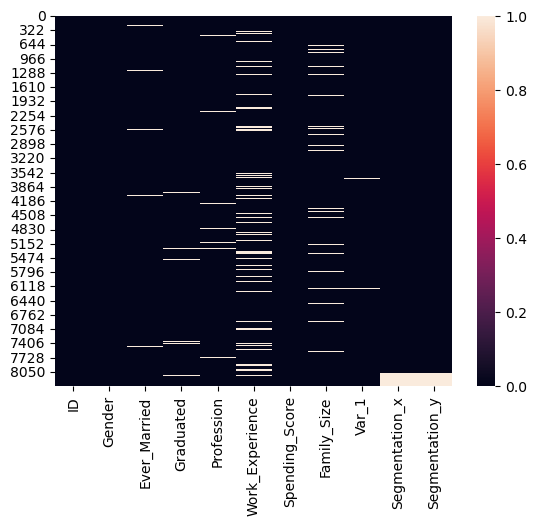

In [22]:
sns.heatmap(finaldf.isnull())

# Imputing Missing Values
If the missing data is Present in -

Continuous variable feature - Fill Median or mean based on the distriution of feature variable

Categorical Variable feature - Fill mode of the column in place of missing data

1)I filled ever_married column with mode

2)I filled graduated column with mode

3)I filled null values of profession column with new feature as 'others'.

4)I filled work experience and family size column  with mean.

5)I filled var1 column with mode.

6)I drop the null values of segmentation_x and segmentation_y.

In [23]:
finaldf['Ever_Married'].value_counts()

Yes    4807
No     3412
Name: Ever_Married, dtype: int64

In [24]:
finaldf['Ever_Married'].fillna(finaldf['Ever_Married'].mode()[0], inplace=True)

In [25]:
finaldf['Graduated'].value_counts()

Yes    5151
No     3132
Name: Graduated, dtype: int64

In [26]:
finaldf['Graduated'].fillna(finaldf['Graduated'].mode()[0], inplace=True)

In [27]:

finaldf['Profession'].value_counts()

Artist           2608
Healthcare       1382
Entertainment     987
Engineer          720
Doctor            713
Lawyer            649
Executive         612
Marketing         310
Homemaker         254
Name: Profession, dtype: int64

In [28]:
finaldf['Profession'].fillna('Others', inplace=True)

In [29]:
finaldf['Profession'].value_counts()

Artist           2608
Healthcare       1382
Entertainment     987
Engineer          720
Doctor            713
Lawyer            649
Executive         612
Marketing         310
Homemaker         254
Others            128
Name: Profession, dtype: int64

In [30]:
finaldf['Work_Experience'].value_counts()

1.0     2441
0.0     2398
9.0      493
8.0      477
2.0      297
4.0      268
3.0      268
5.0      208
6.0      208
7.0      203
10.0      54
11.0      50
12.0      49
13.0      47
14.0      45
Name: Work_Experience, dtype: int64

In [31]:
finaldf['Work_Experience'].fillna(finaldf['Work_Experience'].mean(), inplace=True)

In [32]:
finaldf['Family_Size'].value_counts()

2.0    2478
3.0    1553
1.0    1509
4.0    1423
5.0     638
6.0     220
7.0     100
8.0      52
9.0      46
Name: Family_Size, dtype: int64

In [33]:
finaldf['Family_Size'].fillna(finaldf['Family_Size'].mean(), inplace=True)

In [34]:
finaldf['Var_1'].value_counts()

Cat_6    5418
Cat_4    1131
Cat_3     855
Cat_2     441
Cat_7     213
Cat_1     135
Cat_5      90
Name: Var_1, dtype: int64

In [35]:
finaldf['Var_1'].fillna(finaldf['Var_1'].mode()[0], inplace=True)

In [36]:
finaldf.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Graduated            0
Profession           0
Work_Experience      0
Spending_Score       0
Family_Size          0
Var_1                0
Segmentation_x     295
Segmentation_y     295
dtype: int64

In [37]:
finaldf.dropna(inplace=True)

In [38]:
finaldf.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation_x     0
Segmentation_y     0
dtype: int64

Dropped the ID and Family_size column, has i dont think that this column will be relevant for analysis

In [39]:
columns_to_drop = ['ID','Family_Size']
finaldf = finaldf.drop(columns=columns_to_drop)

In [40]:
finaldf.head()

Gender Ever_Married Graduated     Profession  Work_Experience  \
0    Male           No        No     Healthcare         1.000000   
1  Female          Yes       Yes       Engineer         2.636824   
2  Female          Yes       Yes       Engineer         1.000000   
3    Male          Yes       Yes         Lawyer         0.000000   
4  Female          Yes       Yes  Entertainment         2.636824   

  Spending_Score  Var_1 Segmentation_x Segmentation_y  
0            Low  Cat_4              D              D  
1        Average  Cat_4              A              A  
2            Low  Cat_6              B              B  
3           High  Cat_6              B              B  
4           High  Cat_6              A              A

# Exploratory Data Analysis (EDA)

<Axes: xlabel='Spending_Score', ylabel='count'>

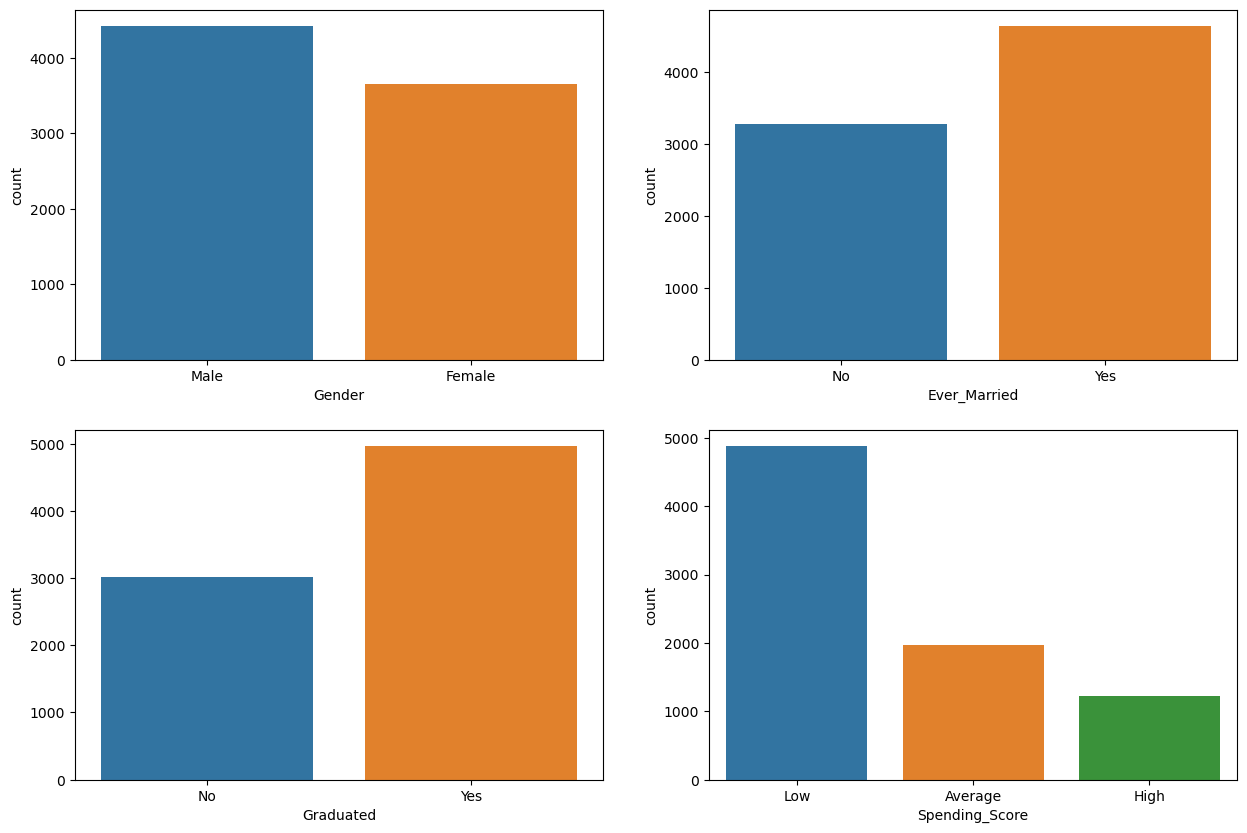

In [41]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.countplot(x ='Gender', data = train_df)
plt.subplot(2,2,2)
sns.countplot(x ='Ever_Married', data = train_df)
plt.subplot(2,2,3)
sns.countplot(x ='Graduated', data = train_df)
plt.subplot(2,2,4)
sns.countplot(x ='Spending_Score', data = train_df)

# Findings:
1)Based on gender distribution there are more males than females in the dataset.

2)Based on ever married distribution,There are more married than un-married people.

3)Based on Graduated distribution,most of the people are graduated.

4)Based on Spending Score Distribution,The majority of customers tend to be low spenders.

<Axes: xlabel='Profession', ylabel='count'>

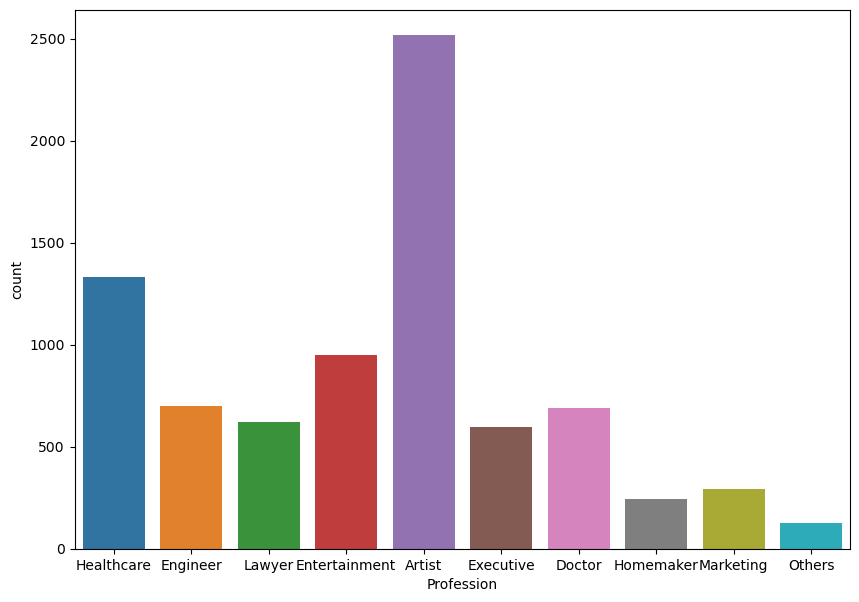

In [42]:
plt.figure(figsize = (10,7))
sns.countplot(x ='Profession', data = finaldf)

Based on Profession distribution,most of the peoples are artist.

<Axes: xlabel='Var_1', ylabel='count'>

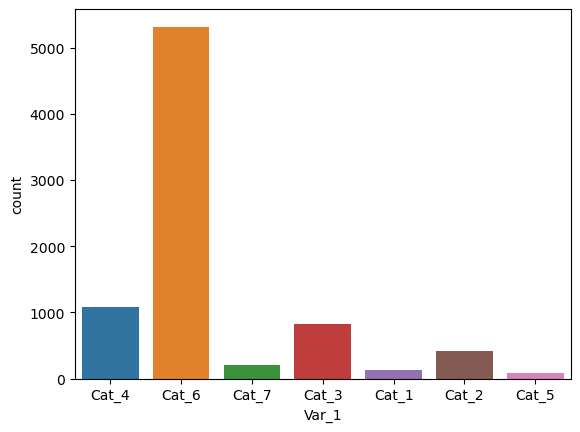

In [43]:
sns.countplot(x ='Var_1', data = finaldf)

Based on Category Distribution, most of the people belongs to category no.6, there are lowest people in category1 and category5

<Axes: xlabel='Spending_Score', ylabel='count'>

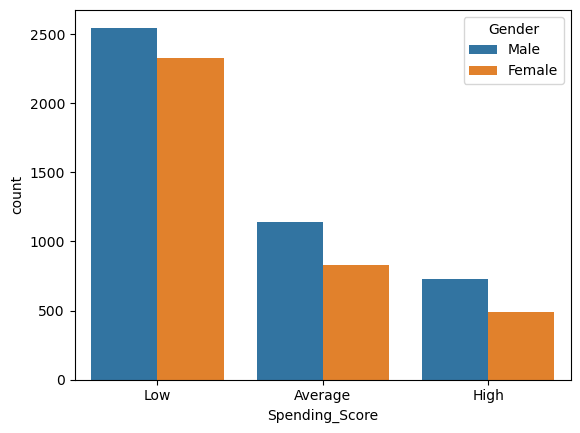

In [44]:
sns.countplot(x ='Spending_Score', hue = 'Gender', data = finaldf)

1)Males tend to have a higher prevalence of low and average spending scores compared to females.

2)Females are more likely to have a high spending score compared to males.

3)There is a significant difference in spending patterns between males and females, with females exhibiting a wider range of spending scores across all categories.







<Axes: xlabel='Spending_Score', ylabel='count'>

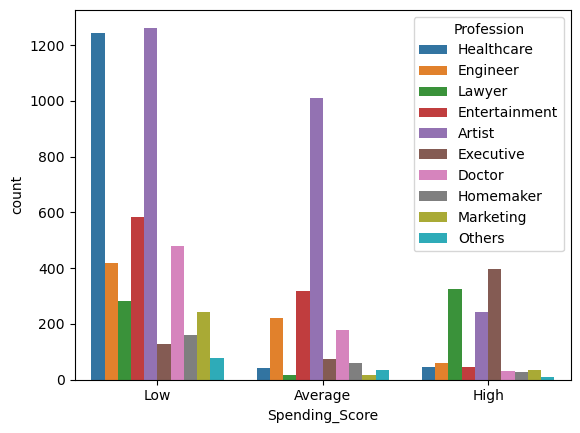

In [45]:
sns.countplot(x ='Spending_Score', hue = 'Profession', data = finaldf)

1)Artist tend to have a higher prevalence of low and average spending scores.

2)Healthcare also tends to have a higher prevalence of low spending scored

<Axes: xlabel='Work_Experience'>

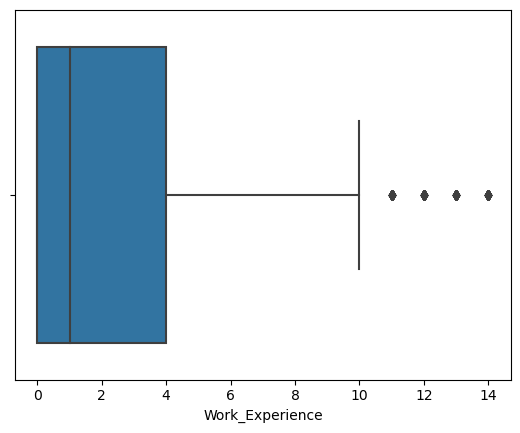

In [46]:
sns.boxplot(x='Work_Experience', data=finaldf)

I have made boxplot for work experience column and i found that there are some outliers in work experience column

# Outlier Detection:
Box plot are the best statistical Measure for Outlier detection. Above Box Plot shows that work experience column has more outliers

In [47]:
column_to_cap = 'Work_Experience'

Q1 = finaldf[column_to_cap].quantile(0.25)
Q3 = finaldf[column_to_cap].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

finaldf[column_to_cap] = finaldf[column_to_cap].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))

In [48]:
lower_limit

-6.0

In [49]:
upper_limit

10.0

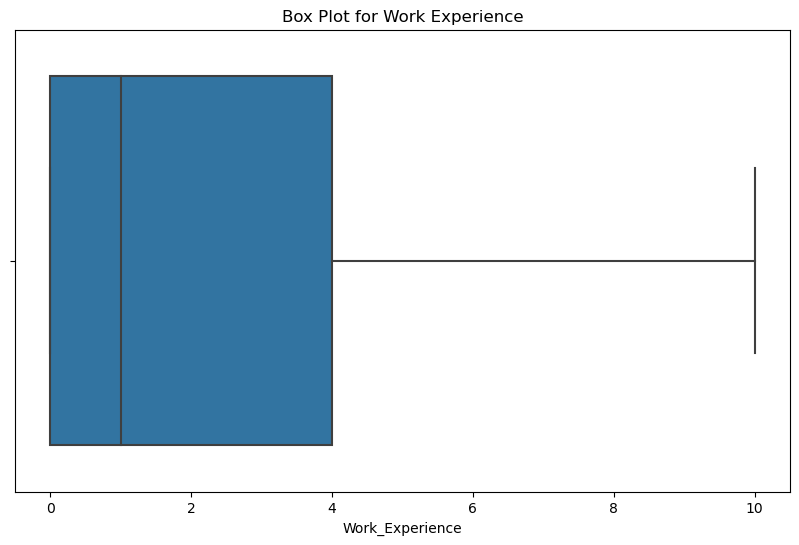

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=finaldf['Work_Experience'])
plt.title('Box Plot for Work Experience')
plt.show()

1)Calculate the first quartile (25th percentile).

2)Calculate the third quartile (75th percentile).

3)Calculate the interquartile range (IQR) as the difference between Q3 and Q1.

4)Calculate the lower limit as Q1 minus 1.5 times the IQR.

5)Calculate the upper limit as Q3 plus 1.5 times the IQR.

6)Apply a lambda function to each value in the 'Work_Experience' column. If a value is less than the lower limit, it is replaced with the lower limit. If a value is greater than the upper limit, it is replaced with the upper limit. Otherwise, the value remains unchanged.

<Axes: xlabel='Work_Experience'>

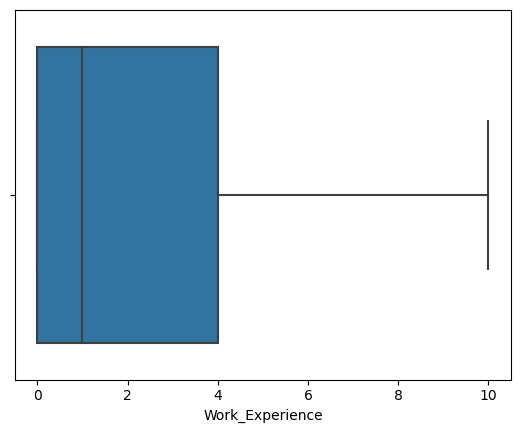

In [51]:
sns.boxplot(x='Work_Experience', data=finaldf)

# Feature Encoding

Feature encoding is a crucial step in preparing categorical data for machine learning models. 

Machine learning algorithms typically require input data to be numerical, so categorical variables need to be converted into a numerical format through feature encoding. 

# Label Encoding:

Label encoding assigns a unique integer value to each category in the variable.

It is suitable for ordinal categorical variables (categories with a meaningful order).

The integers assigned to each category are often based on the order in which they appear in the dataset or their frequency.

# Ordinal Encoding:

Ordinal encoding is similar to label encoding but allows specifying the mapping of categories to integer values explicitly.

It is suitable for ordinal categorical variables where the order of categories is important and predefined.

Ordinal encoding allows for more control over the assignment of integer values to categories.

In [52]:
finaldf['Profession'].value_counts() #I have check the value counts for profession column

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Others            124
Name: Profession, dtype: int64

In [53]:
# Get the value counts for each category in 'Profession'
value_counts = finaldf['Profession'].value_counts()

# Map the categories to their corresponding value counts
finaldf['Profession_Counts'] = finaldf['Profession'].map(value_counts)

1)It counts how many times each profession appears in the 'Profession' column of the dataset.

2)It adds a new column to the dataset called 'Profession_Counts', which shows the number of times each profession appears.

In [54]:
finaldf.head()

Gender Ever_Married Graduated     Profession  Work_Experience  \
0    Male           No        No     Healthcare         1.000000   
1  Female          Yes       Yes       Engineer         2.636824   
2  Female          Yes       Yes       Engineer         1.000000   
3    Male          Yes       Yes         Lawyer         0.000000   
4  Female          Yes       Yes  Entertainment         2.636824   

  Spending_Score  Var_1 Segmentation_x Segmentation_y  Profession_Counts  
0            Low  Cat_4              D              D               1332  
1        Average  Cat_4              A              A                699  
2            Low  Cat_6              B              B                699  
3           High  Cat_6              B              B                623  
4           High  Cat_6              A              A                949

In [55]:
#drop the profession column
columns_to_drop = ['Profession']
finaldf = finaldf.drop(columns=columns_to_drop)

In [56]:
from sklearn.preprocessing import OrdinalEncoder
cols = ['Spending_Score']
encoder = OrdinalEncoder()
finaldf[cols] = encoder.fit_transform(finaldf[cols])
print(finaldf)

      Gender Ever_Married Graduated  Work_Experience  Spending_Score  Var_1  \
0       Male           No        No         1.000000             2.0  Cat_4   
1     Female          Yes       Yes         2.636824             0.0  Cat_4   
2     Female          Yes       Yes         1.000000             2.0  Cat_6   
3       Male          Yes       Yes         0.000000             1.0  Cat_6   
4     Female          Yes       Yes         2.636824             1.0  Cat_6   
...      ...          ...       ...              ...             ...    ...   
8063    Male           No        No         0.000000             2.0  Cat_1   
8064    Male           No        No         3.000000             2.0  Cat_4   
8065  Female           No       Yes         1.000000             2.0  Cat_6   
8066  Female           No       Yes         1.000000             2.0  Cat_6   
8067    Male          Yes       Yes         0.000000             0.0  Cat_4   

     Segmentation_x Segmentation_y  Profession_Coun

It imports the OrdinalEncoder class from the sklearn.preprocessing module. The OrdinalEncoder is used to encode categorical features with ordinal values into numerical values.

In [57]:
cols = ['Gender', 'Ever_Married', 'Graduated']

mappings = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}

for col in cols:
    finaldf[col] = finaldf[col].map(mappings)

print(finaldf)

      Gender  Ever_Married  Graduated  Work_Experience  Spending_Score  Var_1  \
0          1             0          0         1.000000             2.0  Cat_4   
1          0             1          1         2.636824             0.0  Cat_4   
2          0             1          1         1.000000             2.0  Cat_6   
3          1             1          1         0.000000             1.0  Cat_6   
4          0             1          1         2.636824             1.0  Cat_6   
...      ...           ...        ...              ...             ...    ...   
8063       1             0          0         0.000000             2.0  Cat_1   
8064       1             0          0         3.000000             2.0  Cat_4   
8065       0             0          1         1.000000             2.0  Cat_6   
8066       0             0          1         1.000000             2.0  Cat_6   
8067       1             1          1         0.000000             0.0  Cat_4   

     Segmentation_x Segment

In [58]:
finaldf['Var_1'].value_counts()

Cat_6    5314
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64

In [59]:
f = pd.DataFrame({
    'Var_1': ['Cat_6', 'Cat_6', 'Cat_3', 'Cat_2', 'Cat_7', 'Cat_1', 'Cat_5']
})

value_counts = finaldf['Var_1'].value_counts()

finaldf['Var_1_Counts'] = finaldf['Var_1'].map(value_counts)

print(finaldf)

      Gender  Ever_Married  Graduated  Work_Experience  Spending_Score  Var_1  \
0          1             0          0         1.000000             2.0  Cat_4   
1          0             1          1         2.636824             0.0  Cat_4   
2          0             1          1         1.000000             2.0  Cat_6   
3          1             1          1         0.000000             1.0  Cat_6   
4          0             1          1         2.636824             1.0  Cat_6   
...      ...           ...        ...              ...             ...    ...   
8063       1             0          0         0.000000             2.0  Cat_1   
8064       1             0          0         3.000000             2.0  Cat_4   
8065       0             0          1         1.000000             2.0  Cat_6   
8066       0             0          1         1.000000             2.0  Cat_6   
8067       1             1          1         0.000000             0.0  Cat_4   

     Segmentation_x Segment

In [60]:
columns_to_drop=['Var_1']

finaldf = finaldf.drop(columns=columns_to_drop)

print(finaldf.head())

   Gender  Ever_Married  Graduated  Work_Experience  Spending_Score  \
0       1             0          0         1.000000             2.0   
1       0             1          1         2.636824             0.0   
2       0             1          1         1.000000             2.0   
3       1             1          1         0.000000             1.0   
4       0             1          1         2.636824             1.0   

  Segmentation_x Segmentation_y  Profession_Counts  Var_1_Counts  
0              D              D               1332          1089  
1              A              A                699          1089  
2              B              B                699          5314  
3              B              B                623          5314  
4              A              A                949          5314  


In [61]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

finaldf['Segmentation_encoded_x'] = label_encoder.fit_transform(finaldf['Segmentation_x'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)

Label Encoding Mapping:
{'A': 0, 'B': 1, 'C': 2, 'D': 3}


1)We import the LabelEncoder class from the sklearn.preprocessing module. This class helps convert categorical labels into numerical ones.

2)We create an instance of the LabelEncoder class and store it in the variable label_encoder.

3)The fit_transform() method of the LabelEncoder is applied to the 'Segmentation_x' column of finaldf, which both fits the encoder to the data and transforms the categorical values into numerical values.

4)The resulting numerical values are assigned to a new column called 'Segmentation_encoded_x' in the DataFrame finaldf.

5)We create a dictionary called label_mapping that maps each original categorical label to its corresponding numerical label using the zip() function.

In [62]:
finaldf['Segmentation_encoded_y'] = label_encoder.fit_transform(finaldf['Segmentation_y'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)

Label Encoding Mapping:
{'A': 0, 'B': 1, 'C': 2, 'D': 3}


In [63]:
finaldf.head()

Gender  Ever_Married  Graduated  Work_Experience  Spending_Score  \
0       1             0          0         1.000000             2.0   
1       0             1          1         2.636824             0.0   
2       0             1          1         1.000000             2.0   
3       1             1          1         0.000000             1.0   
4       0             1          1         2.636824             1.0   

  Segmentation_x Segmentation_y  Profession_Counts  Var_1_Counts  \
0              D              D               1332          1089   
1              A              A                699          1089   
2              B              B                699          5314   
3              B              B                623          5314   
4              A              A                949          5314   

   Segmentation_encoded_x  Segmentation_encoded_y  
0                       3                       3  
1                       0                       0  
2                       1                       1  
3                       1                       1  
4                       0                       0

In [64]:
columns_to_drop=['Segmentation_x','Segmentation_y']

finaldf = finaldf.drop(columns=columns_to_drop)

### This is our final dataset with all the numerical values.

In [65]:
finaldf.head()

Gender  Ever_Married  Graduated  Work_Experience  Spending_Score  \
0       1             0          0         1.000000             2.0   
1       0             1          1         2.636824             0.0   
2       0             1          1         1.000000             2.0   
3       1             1          1         0.000000             1.0   
4       0             1          1         2.636824             1.0   

   Profession_Counts  Var_1_Counts  Segmentation_encoded_x  \
0               1332          1089                       3   
1                699          1089                       0   
2                699          5314                       1   
3                623          5314                       1   
4                949          5314                       0   

   Segmentation_encoded_y  
0                       3  
1                       0  
2                       1  
3                       1  
4                       0

# Data Splitting

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = finaldf.drop('Segmentation_encoded_x',axis=1)
y = finaldf['Segmentation_encoded_x']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
X_train

Gender  Ever_Married  Graduated  Work_Experience  Spending_Score  \
5015       1             1          1         1.000000             2.0   
5755       1             1          1         0.000000             1.0   
7781       0             0          1         8.000000             2.0   
4518       0             1          1         2.636824             2.0   
6195       1             0          0         1.000000             2.0   
...      ...           ...        ...              ...             ...   
5226       1             1          1         0.000000             2.0   
5390       1             0          0         1.000000             2.0   
860        0             0          1         4.000000             2.0   
7603       1             1          1         0.000000             2.0   
7270       0             0          1         1.000000             2.0   

      Profession_Counts  Var_1_Counts  Segmentation_encoded_y  
5015                949          5314                       0  
5755                623          5314                       0  
7781               1332          5314                       3  
4518                246           822                       0  
6195               1332          1089                       3  
...                 ...           ...                     ...  
5226               1332          5314                       3  
5390               1332          5314                       1  
860                 623          5314                       1  
7603               2516          1089                       0  
7270               1332          5314                       2  

[5647 rows x 8 columns]

In [70]:
X_test

Gender  Ever_Married  Graduated  Work_Experience  Spending_Score  \
742        1             0          1         2.636824             2.0   
2127       0             1          1         0.000000             0.0   
2107       1             0          1         4.000000             2.0   
2943       1             1          1         1.000000             0.0   
4362       0             0          0         1.000000             2.0   
...      ...           ...        ...              ...             ...   
144        0             1          0         0.000000             0.0   
1340       1             1          0         1.000000             0.0   
5733       0             0          0         2.636824             2.0   
3187       0             1          1         0.000000             2.0   
2091       1             1          1         2.636824             0.0   

      Profession_Counts  Var_1_Counts  Segmentation_encoded_y  
742                 949          1089                       3  
2127                949          5314                       0  
2107               1332           422                       3  
2943                949          5314                       2  
4362                949          5314                       3  
...                 ...           ...                     ...  
144                 699          1089                       1  
1340               2516          5314                       2  
5733                688           203                       0  
3187               2516          5314                       1  
2091                949          5314                       2  

[2421 rows x 8 columns]

# Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lgt = LogisticRegression(multi_class='multinomial')

In [72]:
lgt.fit(X_train, y_train)
accuracy_score(y_test, lgt.predict(X_test))

C:\Users\Tanvi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7732342007434945

# K-nearest Neighbors

K-nearest neighbors (KNN) is like asking your neighbors for advice.

When you want to classify or predict something for a new data point, KNN looks at the K closest data points around it.

It then checks what those nearby points are and decides based on what most of them are. 

It's a friendly and straightforward approach that doesn't need much training, making it great for simple tasks and easy to understand.

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
# Define the kNN classifier
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [75]:
# Train the classifier
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [76]:
 #Predict the labels for the test set
y_pred = knn_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8669971086327963


# Hyperparameter Tuning 

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
# Define hyperparameters grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'p': [1, 2]  # Power parameter for Minkowski metric (1: Manhattan, 2: Euclidean)
}

# KNN model
knn = KNeighborsClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get best model
best_knn = grid_search.best_estimator_

# Evaluate performance on test set
test_accuracy = best_knn.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

C:\Users\Tanvi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Tanvi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Tanvi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Tanvi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Tanvi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

Best hyperparameters: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Test accuracy: 0.9049979347377117


C:\Users\Tanvi\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [0.88259404 0.90189721 0.86470837 0.88684324 0.87551173 0.90650102
 0.85514756 0.88649114 0.86842832 0.90189674 0.84469959 0.87922996
 0.8640015  0.89959444 0.82575104 0.87125987 0.88312533 0.90242849
 0.86453122 0.88666609 0.87639669 0.906855   0.85638697 0.8875534
 0.86842801 0.90278232 0.8445226  0.87869898 0.86187667 0.89924046
 0.82699139 0.87196877 0.88259404 0.90189721 0.86470837 0.88684324
 0.87551173 0.90650102 0.85514756 0.88649114 0.86842832 0.90189674
 0.84469959 0.87922996 0.8640015  0.89959444 0.82575104 0.87125987
        nan 0.90242802        nan 0.88790519        nan 0.90384427
        nan 0.88312627        nan 0.90278248        nan 0.87852183
        nan 0.89994827        nan 0.87090573]
  warnings.warn(


# Best Hyperparameters:

1)K-nearest neighbors (KNN) classifier utilized.

2)Best Hyperparameters:

Algorithm: Ball tree

Number of neighbors (k): 5

Distance metric: Manhattan (p=1)

Weights: Distance-based

3)Achieved test accuracy: Approximately 90.5%.

4)Ball tree algorithm chosen for efficient handling of potentially high-dimensional data.

5)Small number of neighbors (5) and Manhattan distance focus on local patterns in feature space.
  
# Test Accuracy:

The test accuracy achieved with these hyperparameters is approximately 90.49%.

Test accuracy is a measure of how well the model performs on unseen data.

It indicates the proportion of correctly predicted outcomes in the test dataset.

In [79]:
import pandas as pd

# Create a DataFrame with actual and predicted labels
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the DataFrame
print(results_df)

      Actual  Predicted
742        3          3
2127       0          0
2107       3          3
2943       2          2
4362       3          3
...      ...        ...
144        1          1
1340       2          2
5733       0          0
3187       1          1
2091       2          2

[2421 rows x 2 columns]


In [80]:
#import classification report
from sklearn.metrics import classification_report

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       597
           1       0.78      0.82      0.80       552
           2       0.89      0.84      0.87       580
           3       0.92      0.92      0.92       692

    accuracy                           0.87      2421
   macro avg       0.86      0.86      0.86      2421
weighted avg       0.87      0.87      0.87      2421



# CONCLUSION:

1)The comparison between actual and predicted segmentations demonstrates that the segmentation model is performing well across various segments.

2)By accurately identifying customer segments, the company can optimize its market penetration strategies and expand its reach into new markets with confidence.

3)The significant improvement in accuracy from 86% to 90% after hyperparameter tuning suggests that the tuned K Nearest neighbor
regression model outperforms the initial one.

4)This highlights the critical impact of hyperparameter optimization in enhancing model performance and underscores the 
importance of thorough experimentation for achieving the best results in machine learning tasks.

5)Hence, the knn model is the preferred choice for predicting customer segments in new market